In [1]:
from sbi.examples.minimal import simple
posterior = simple()
print(posterior)

Running 500 simulations.:   0%|          | 0/500 [00:00<?, ?it/s]

Neural network successfully converged after 49 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

Posterior conditional density p(θ|x) (amortized).

This DirectPosterior-object was obtained with a SNPE-class method using a flow.
It allows to .sample() and .log_prob() the posterior and wraps the output of the .net to avoid leakage into regions with 0 prior probability.


In [3]:
import torch
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer

In [8]:
num_dim = 3
prior = utils.BoxUniform(low=-2*torch.ones(num_dim), high=2*torch.ones(num_dim))

def simulator(parameter_set):
    return 1.0 + parameter_set + torch.randn(parameter_set.shape) * 0.1


posterior = infer(simulator, prior, method='SNPE', num_simulations=1000)

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Neural network successfully converged after 148 epochs.


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

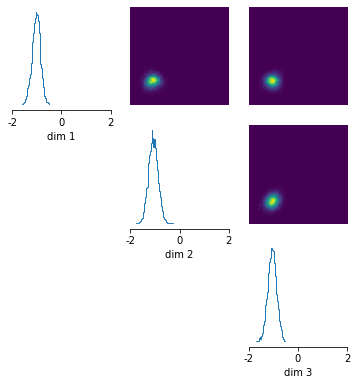

In [10]:
observation = torch.zeros(3)
samples = posterior.sample((10000,), x=observation)
log_probability = posterior.log_prob(samples, x=observation)
_ = analysis.pairplot(samples, limits=[[-2,2],[-2,2],[-2,2]], figsize=(6,6))

In [11]:
posterior = infer(simulator, prior, method='SNPE', num_simulations=1000)
#posterior = infer(simulator, prior, method='SNLE', num_simulations=1000)
#posterior = infer(simulator, prior, method='SNRE', num_simulations=1000)

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Neural network successfully converged after 137 epochs.


In [12]:
#posterior = infer(simulator, prior, method='SNPE', num_simulations=1000)
posterior = infer(simulator, prior, method='SNLE', num_simulations=1000)
#posterior = infer(simulator, prior, method='SNRE', num_simulations=1000)

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Neural network successfully converged after 121 epochs.
